# (Effect of Flight Ch/s on Arrival Delay)
## by (Anas)

## Investigation Overview

> I wanted to look at the characteristics of flight delays that could be used to predict their arrival delay. The main focus was on  AIR_SYSTEM_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY

## Dataset Overview

> the data has one million of flights in 2015, including airline , month, airport and flight number for each.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('flights.csv')
df = df.sample(1000000)


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Distribution of Arrival Delay)

> it take a very long range of delays.between -50 and +1500.  

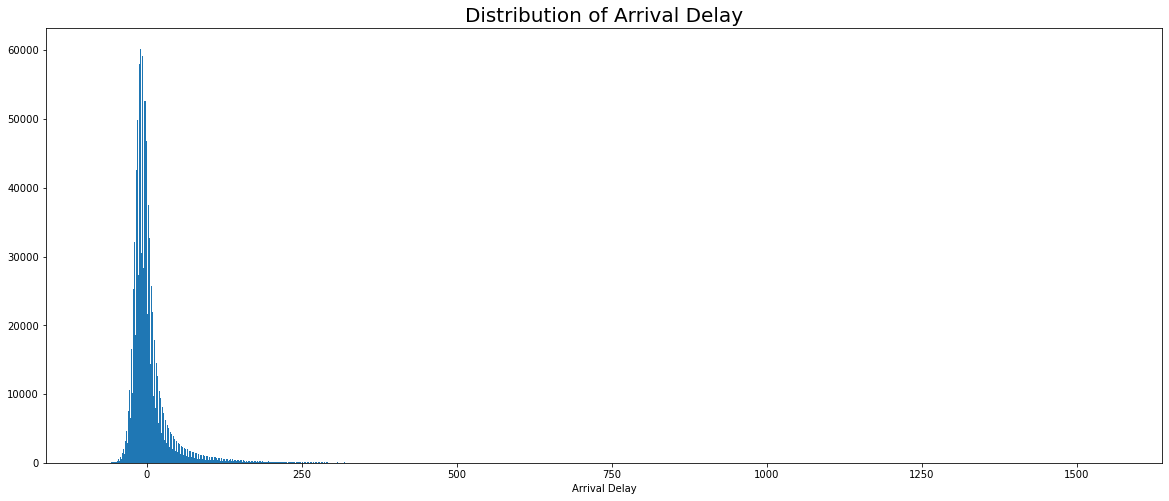

In [3]:
plt.figure(figsize = [20,8]);
plt.hist(df['ARRIVAL_DELAY'], bins =1000);
plt.title('Distribution of Arrival Delay' , fontsize = 20);
plt.xlabel('Arrival Delay');


## (Airline Delay vs  Arrival Delay)

> Plotting airline lay with arrival delay produce a approximately linear relation. At low points of airline delay the arrival delay has delays because of other factors such as weather and security delays.

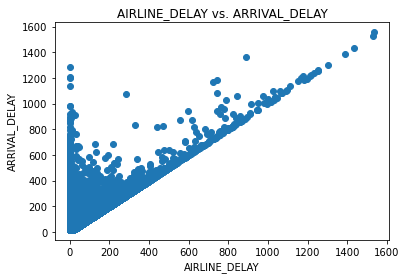

In [4]:
plt.scatter(data = df , x = 'AIRLINE_DELAY' , y = 'ARRIVAL_DELAY');
plt.title('AIRLINE_DELAY vs. ARRIVAL_DELAY' , fontsize = 12);
plt.xlabel('AIRLINE_DELAY');
plt.ylabel('ARRIVAL_DELAY');


## (Weather Delay vs  Months)
> Getting mean time delay for each month shows how Febraury was cloudy and highly affect on flight arrival compared to December and Januaray. 

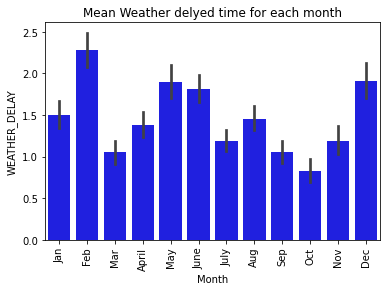

In [5]:
ordinal_var_dict = {'MONTH': [1,2,3,4,5,6,7,8,9,10,11,12]}
ordered_var = pd.api.types.CategoricalDtype(ordered = True,categories = ordinal_var_dict['MONTH'])
df['month'] = df['MONTH'].astype(ordered_var)

df['DELAYED'] = df['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 0 else 0)
df_delay = df[df['DELAYED'] == 1]
df_delay = df_delay[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]
df_delay['AIRLINE'] = df['AIRLINE']
df_delay['TOT_DELAY'] = df['AIR_SYSTEM_DELAY']+df['SECURITY_DELAY']+df['AIRLINE_DELAY']+df['LATE_AIRCRAFT_DELAY']+df['WEATHER_DELAY']
df_delay.fillna(0 ,inplace = True)
delayed = df[df['DELAYED'] == 1]
df_delay['month'] = delayed['month'] 
df_delay.head()
sb.barplot(data = df_delay , x = 'month' , y = 'WEATHER_DELAY' , color  = 'b');
plt.title('Mean Weather delyed time for each month');
plt.xlabel('Month')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','April','May','June','July','Aug','Sep','Oct','Nov','Dec'],rotation = 90);

## (Airline Delay and Arrival Delay for Each Airline Company )

> logically, airline delay has positive relation with arrival delay. But you can see how American Airline Company ,AA, has the most time wasted in airline delays.

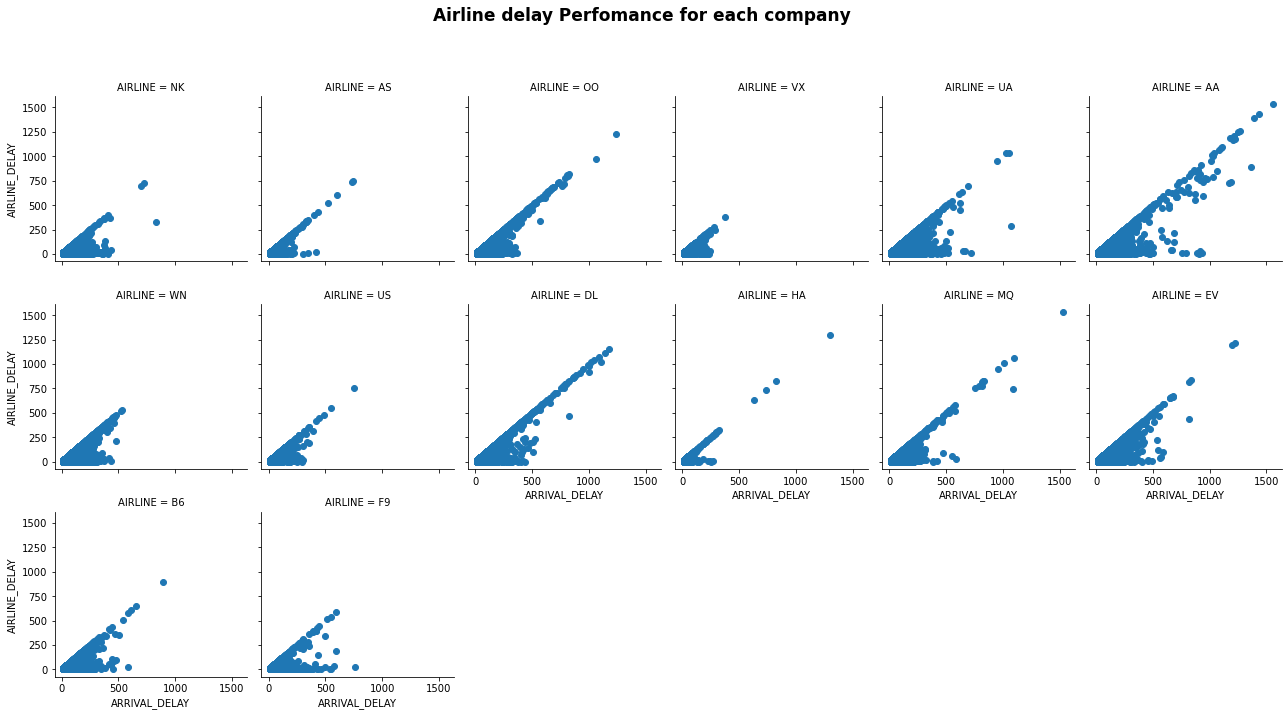

In [6]:
airline_cause = df[df['AIRLINE_DELAY'] > 0]
g = sb.FacetGrid(data =airline_cause , col = 'AIRLINE' , col_wrap = 6 ,aspect = 1 );
plt.suptitle('Airline delay Perfomance for each company ' , fontsize=17 , y = 1.1 ,weight = 'bold' );

g.map (plt.scatter , 'ARRIVAL_DELAY' , 'AIRLINE_DELAY' );


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [8]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 408622 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\PROOO\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\PROOO\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\PROOO\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\PROOO\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\PROOO\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File